In [1]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

In [12]:
from pandas import read_csv
data= read_csv('Iris.csv')
X= data.drop('Species', axis=1)
y=data['Species']
X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [13]:
X.head(2)    
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = LogisticRegression( )    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

In [20]:
import warnings
warnings.filterwarnings("ignore")

label = ['Decision Tree', 'LR', 'Bagging Tree', 'Bagging LR']
clf_list = [clf1, clf2, bagging1, bagging2]
 

for clf, label  in zip(clf_list, label ):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy:  ",(scores.mean(), scores.std(), label))

Accuracy:   (0.66, 0.0, 'Decision Tree')
Accuracy:   (0.9733333333333333, 0.009428090415820642, 'LR')
Accuracy:   (0.7666666666666666, 0.1369509238944942, 'Bagging Tree')
Accuracy:   (0.9533333333333333, 0.009428090415820642, 'Bagging LR')


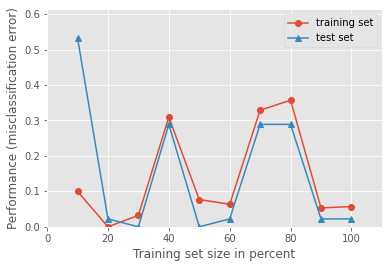

In [21]:

#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging1, print_model=False, style='ggplot')
plt.show()

In [40]:

#Ensemble Size
 
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for i in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=i, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
bg_clf_cv_std

[0.14142135623730948,
 0.016329931618554488,
 0.1329995822884,
 0.024944382578492918,
 0.0,
 0.016329931618554536,
 0.018856180831641232,
 0.016329931618554488,
 0.018856180831641232]

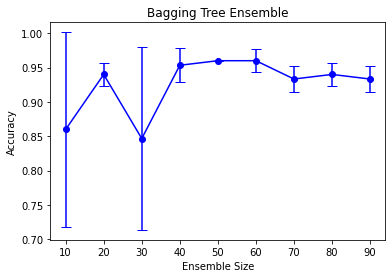

In [44]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()


Boosting

In [45]:
from sklearn.ensemble import AdaBoostClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

In [48]:
#Ensemble Size
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

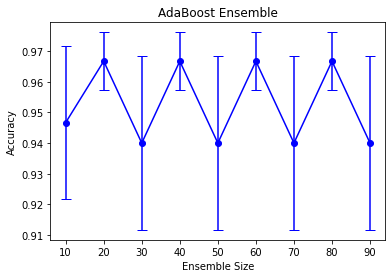

In [49]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('AdaBoost Ensemble');
plt.show()